In [2]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn-deep')
sns.set_style("ticks")
sns.set_palette("deep")

In [3]:
df = pd.read_csv("../data/supermarket_sales_clean.csv")

In [4]:
df.head()

,city,customer_type,gender,product_line,unit_price,quantity,tax_5%,total_price,date,payment_method,cost_of_goods_sold,gross_income,rating
0,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,Ewallet,522.83,26.1415,9.1
1,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,Cash,76.40,3.8200,9.6
2,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,Credit card,324.31,16.2155,7.4
3,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,Ewallet,465.76,23.2880,8.4
4,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,Ewallet,604.17,30.2085,5.3


In [5]:
df.shape

(1000, 13)

In [6]:
city_filter_yangon = df[df['city']=='Yangon']
city_filter_mandalay = df[df['city']=='Mandalay']
city_filter_naypyitaw = df[df['city']=='Naypyitaw']

male_filter = df[df['gender']=='Male']
female_filter = df[df['gender']=='Female']

member_filter = df[df['customer_type']=='Member']
nonmember_filter = df[df['customer_type']=='Normal']

payment_ewallet_filter = df[df['payment_method']=='Ewallet']
payment_cash_filter = df[df['payment_method']=='Cash']
payment_creditcard_filter = df[df['payment_method']=='Credit card']

### Assessing Representation

In [7]:
print("Total number of transactions = {:,}\n".format(len(df)))
print("Transactions at Yangon = {:} ~ ({:.1%})".format(len(city_filter_yangon), (len(city_filter_yangon)/len(df))))
print("Transactions at Mandalay = {:} ~ ({:.1%})".format(len(city_filter_mandalay), (len(city_filter_mandalay)/len(df))))
print("Transactions at Naypyitaw = {:} ~ ({:.1%})\n".format(len(city_filter_naypyitaw), (len(city_filter_naypyitaw)/len(df))))
print(df['product_line'].value_counts())
print("\nTransactions by male customers = {:}".format(len(male_filter)))
print("Transactions by female customers = {:}\n".format(len(female_filter)))
print("Transactions by memberss = {:}".format(len(member_filter)))
print("Transactions by non-members = {:}\n".format(len(nonmember_filter)))
print(df['payment_method'].value_counts())

Total number of transactions = 1,000

Transactions at Yangon = 340 ~ (34.0%)
Transactions at Mandalay = 332 ~ (33.2%)
Transactions at Naypyitaw = 328 ~ (32.8%)

Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: product_line, dtype: int64

Transactions by male customers = 499
Transactions by female customers = 501

Transactions by memberss = 501
Transactions by non-members = 499

Ewallet        345
Cash           344
Credit card    311
Name: payment_method, dtype: int64


In [11]:
print("***************")
print("Rating Analysis")
print("***************\n")

print("Overall Minimum rating = {}".format(min(df['rating'])))
print("Overall Maximum rating = {}".format(max(df['rating'])))
print("Overall Average rating = {:.2f}\n".format(df['rating'].mean()))

print(df.groupby('city')['rating'].mean().to_string())
print()
print(df.groupby('gender')['rating'].mean().to_string())
print()
print(df.groupby('product_line')['rating'].mean().to_string())
print()
print(df.groupby('payment_method')['rating'].mean().to_string())

***************
Rating Analysis
***************

Overall Minimum rating = 4.0
Overall Maximum rating = 10.0
Overall Average rating = 6.97

city
Mandalay     6.818072
Naypyitaw    7.072866
Yangon       7.027059

gender
Female    6.964471
Male      6.980962

product_line
Electronic accessories    6.924706
Fashion accessories       7.029213
Food and beverages        7.113218
Health and beauty         7.003289
Home and lifestyle        6.837500
Sports and travel         6.916265

payment_method
Cash           6.970058
Credit card    7.003215
Ewallet        6.947826


In [83]:
def find_below_avg(column_name):
    x_list = df[column_name].unique()
    for x in x_list:
        x_filter = df[df[column_name]==x]
        if x_filter['rating'].mean() < df['rating'].mean():
            print('{:s} = {:.2f}'.format(x, x_filter['rating'].mean()))

In [85]:
print("***************")
print("Rating Analysis")
print("***************\n")

print("Below Avg. Ratings:\n")
find_below_avg('city')
find_below_avg('gender')
find_below_avg('product_line')
find_below_avg('payment_method')

***************
Rating Analysis
***************

Below Avg. Ratings:

Mandalay = 6.82
Female = 6.96
Electronic accessories = 6.92
Home and lifestyle = 6.84
Sports and travel = 6.92
Ewallet = 6.95
Cash = 6.97


In [34]:
print("Sales Analysis\n")

print("Mandalay  = {:,}".format(round(city_filter_mandalay['gross_income'].sum())))
print("Naypyitaw = {:,}".format(round(city_filter_naypyitaw['gross_income'].sum())))
print("Yangon    = {:,}\n".format(round(city_filter_yangon['gross_income'].sum())))

print(df.groupby('product_line')['gross_income'].sum())
print()
print(df.groupby('payment_method')['gross_income'].sum())

Sales Analysis

Mandalay  = 5,057.0
Naypyitaw = 5,265.0
Yangon    = 5,057.0

product_line
Electronic accessories    2587.5015
Fashion accessories       2585.9950
Food and beverages        2673.5640
Health and beauty         2342.5590
Home and lifestyle        2564.8530
Sports and travel         2624.8965
Name: gross_income, dtype: float64

payment_method
Cash           5343.170
Credit card    4798.432
Ewallet        5237.767
Name: gross_income, dtype: float64


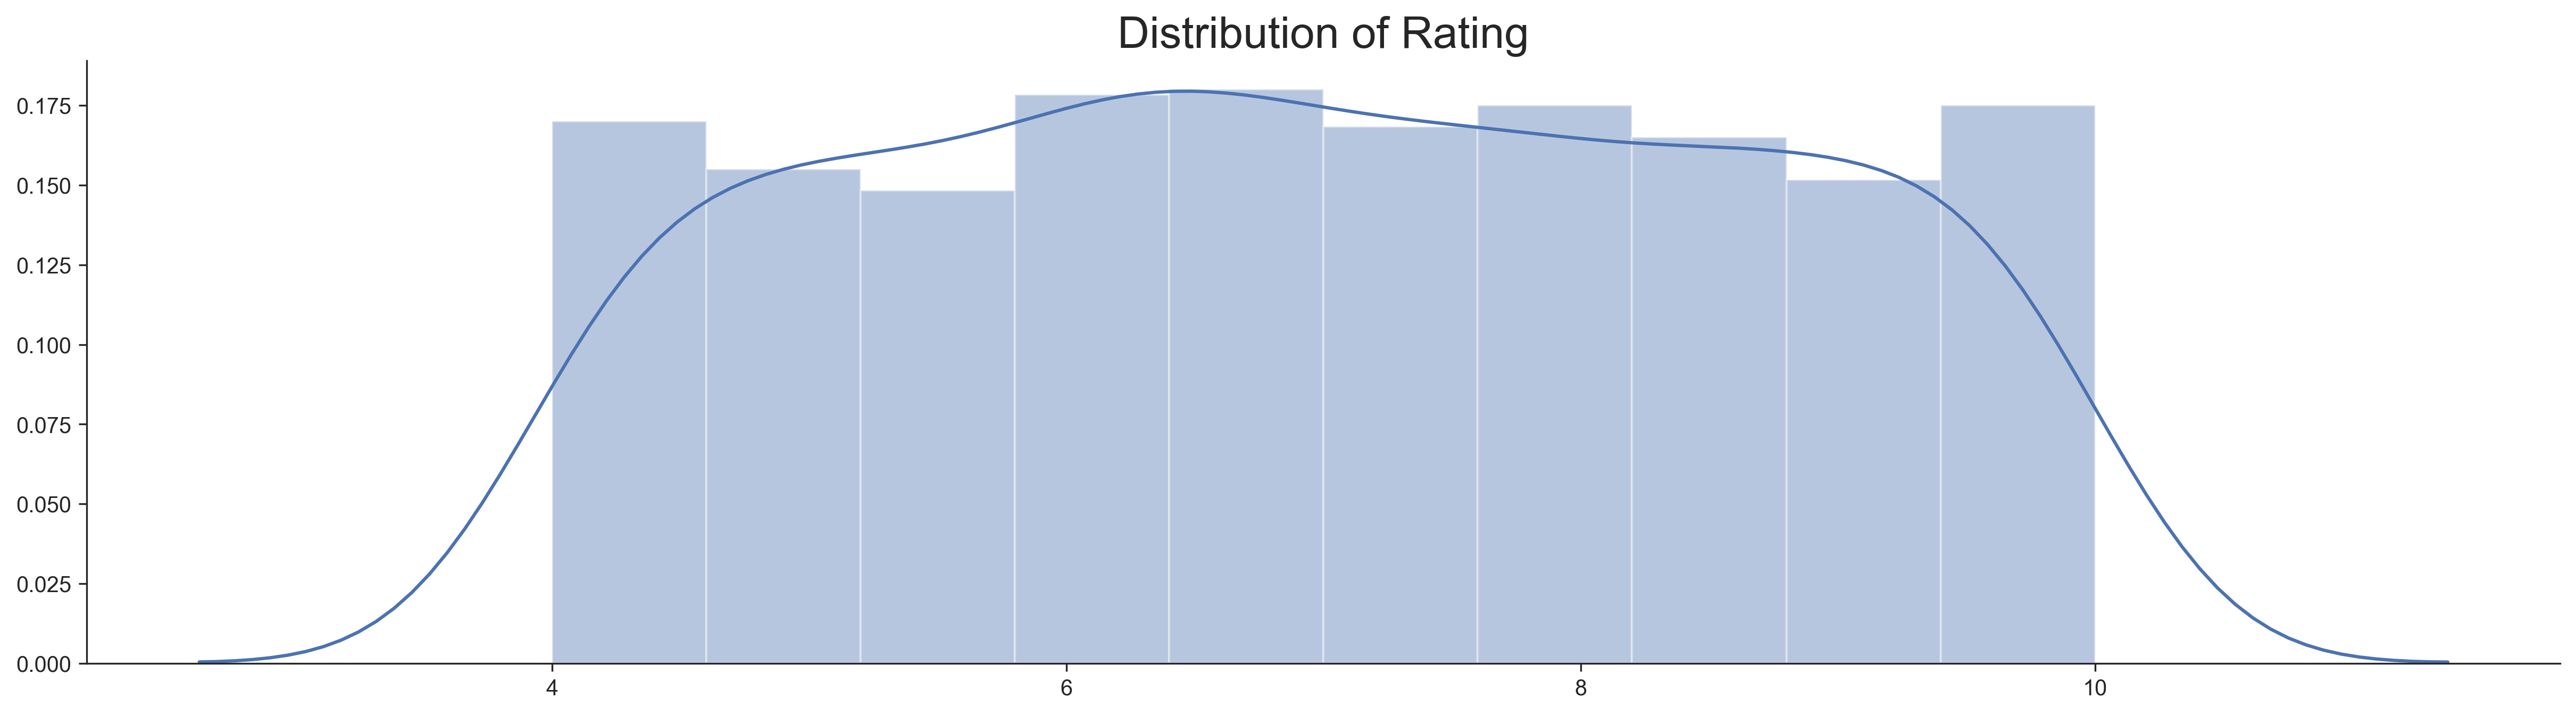

In [15]:
plt.figure(figsize=(20, 5), dpi=300)
sns.distplot(df['rating'])
plt.xlabel('', fontsize = 15)
plt.title('Distribution of Rating', fontsize=20)
sns.despine(top=True);

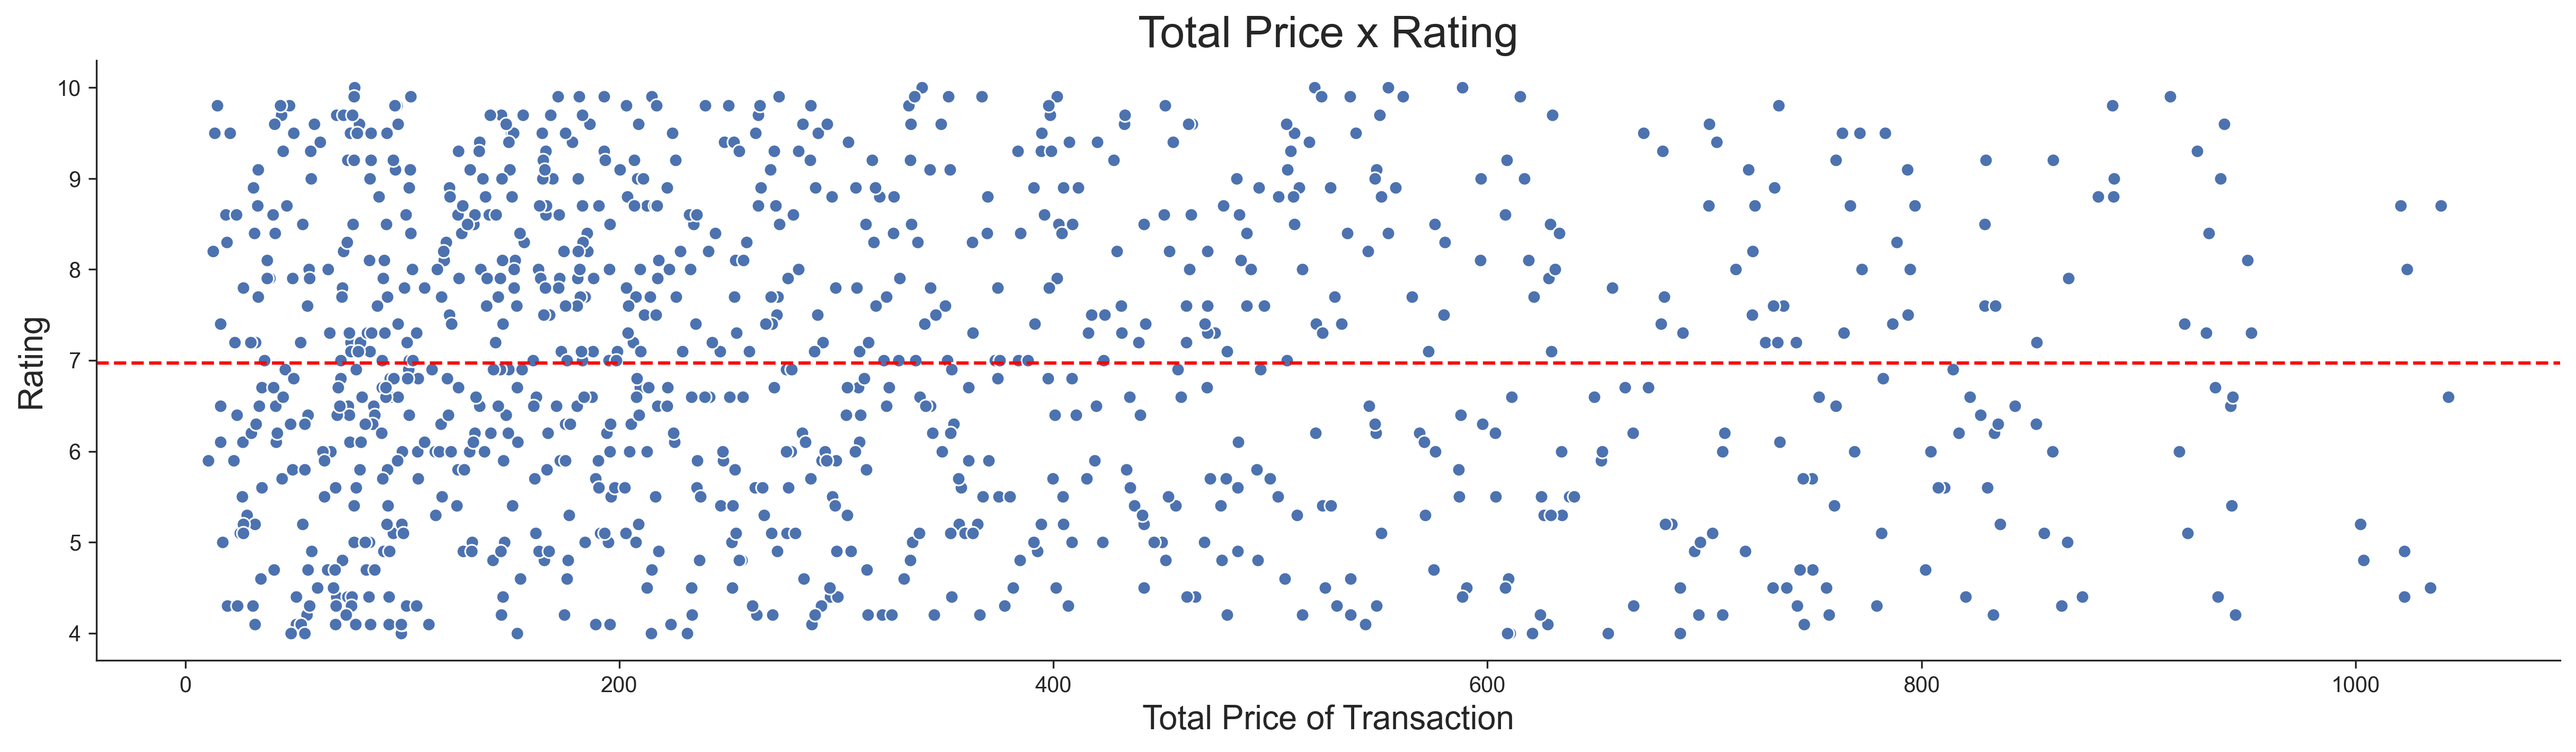

In [91]:
plt.figure(figsize=(20, 5), dpi=300)
sns.scatterplot(data=df,
                x='total_price',
               y='rating')
plt.xlabel('Total Price of Transaction', fontsize = 15)
plt.ylabel('Rating', fontsize = 15)
plt.title('Total Price x Rating', fontsize=20)
plt.axhline(df['rating'].mean(), ls='--', c='red')
sns.despine(top=True);

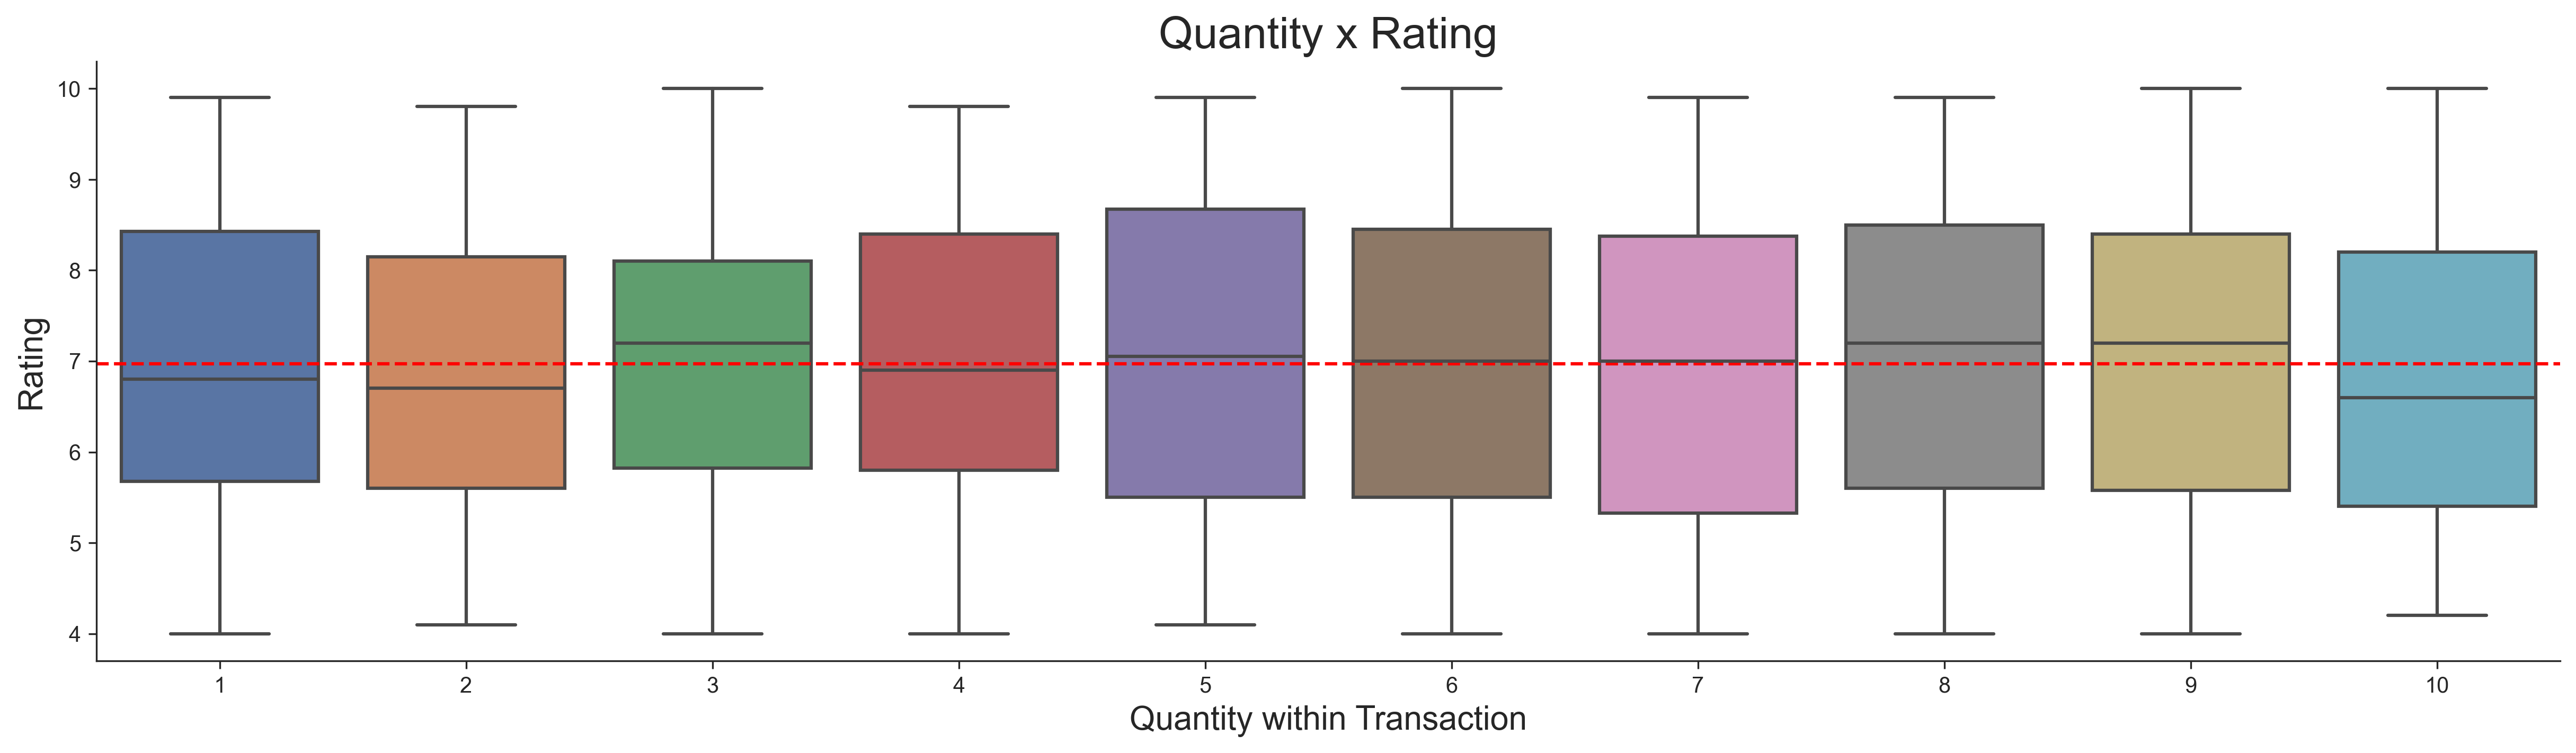

In [92]:
plt.figure(figsize=(20, 5), dpi=300)
sns.boxplot(data=df,
                x='quantity',
               y='rating')
plt.xlabel('Quantity within Transaction', fontsize = 15)
plt.ylabel('Rating', fontsize = 15)
plt.title('Quantity x Rating', fontsize=20)
plt.axhline(df['rating'].mean(), ls='--', c='red')
sns.despine(top=True);